STUDENT NAME: ANN MARIYA VAZHAPPILLY NICLAVOS
STUDENT ID: VAZ22608613
DATE : 27/08/2024
Description: This script is used for predicting the length of hospital stay using Machine learning model and Deep learning.

Importing Necessary Libraries

In [54]:
import pandas as pd  # For data manipulation and analysis, particularly for handling structured data in DataFrames
import numpy as np  # For numerical operations and array handling, providing support for large, multi-dimensional arrays
import scipy.sparse  # For working with sparse matrices, which are memory-efficient representations of large, sparse datasets

from sklearn.tree import plot_tree  # Import the plot_tree function to visualize decision trees
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # For performing hyperparameter tuning using grid and randomized search
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # For encoding categorical features as numeric and standardizing features by removing the mean and scaling to unit variance
from sklearn.compose import ColumnTransformer  # For applying different preprocessing steps to different subsets of features
from sklearn.pipeline import Pipeline  # For assembling a sequence of transforms and a final estimator into a single pipeline
from sklearn.ensemble import RandomForestRegressor  # For building a Random Forest model for regression tasks
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # # Importing evaluation metrics from sklearn.metrics
# mean_squared_error: Calculates the average squared difference between predicted and actual values (lower is better).
# mean_absolute_error: Measures the average absolute difference between predictions and actual values (lower is better).
# r2_score: Indicates how well the model explains the variance in the data (closer to 1 is better).


import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
import seaborn as sns  # For creating statistical data visualizations, built on top of Matplotlib
import joblib  # For saving and loading Python objects, particularly machine learning models

from tensorflow.keras.models import Sequential, load_model  # For defining and loading Keras models, particularly sequential neural network models
from tensorflow.keras.layers import Dense, Dropout, Input  # For constructing different layers in a neural network, including fully connected layers and dropout layers for regularization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # For implementing callbacks that help prevent overfitting and adjust learning rates during training
from tensorflow.keras.utils import plot_model #Import the function to visualize the architecture of a Keras model

Loading and Combining Datasets

In [55]:
# Load datasets
df1 = pd.read_csv('/content/drive/MyDrive/Msc Project/diabetic_data_subset_500.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Msc Project/diabetic_data_new_subset_500.csv')

# Combine datasets if needed
df = pd.concat([df1, df2], ignore_index=True).drop_duplicates()

# Save the combined datasets to a CSV file
combined_dataset_path = 'combined_diabetic_data.csv'
df.to_csv(combined_dataset_path, index=False)
print(f"Combined dataset saved to {combined_dataset_path}")

Combined dataset saved to combined_diabetic_data.csv


Data Cleaning

In [56]:
# Drop rows with missing target
df_cleaned = df.dropna(subset=['time_in_hospital'])

# Inspect the data
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              1999 non-null   int64 
 1   patient_nbr               1999 non-null   int64 
 2   race                      1999 non-null   object
 3   gender                    1999 non-null   object
 4   age                       1999 non-null   object
 5   weight                    1999 non-null   object
 6   admission_type_id         1999 non-null   int64 
 7   discharge_disposition_id  1999 non-null   int64 
 8   admission_source_id       1999 non-null   int64 
 9   time_in_hospital          1999 non-null   int64 
 10  payer_code                1999 non-null   object
 11  medical_specialty         1999 non-null   object
 12  num_lab_procedures        1999 non-null   int64 
 13  num_procedures            1999 non-null   int64 
 14  num_medications           199

Feature Selection and Data Splitting

In [57]:
# Select relevant features and target variable
features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'num_lab_procedures', 'num_medications', 'number_diagnoses',
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3'
]
target = 'time_in_hospital'

# Split data into features and target
X = df_cleaned[features]
y = df_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Preprocessing

In [58]:
# Preprocessing pipelines for numeric and categorical data
numeric_features = ['num_lab_procedures', 'num_medications', 'number_diagnoses']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3'
]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

Data Visualization

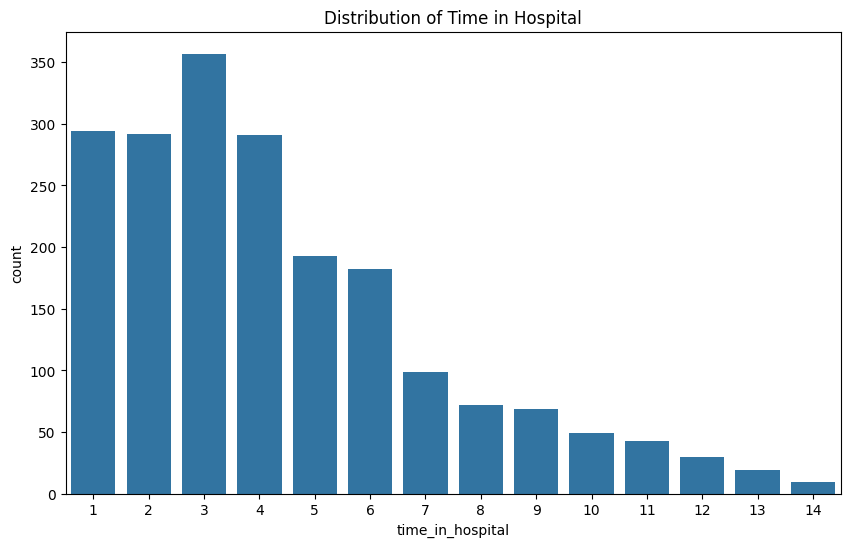

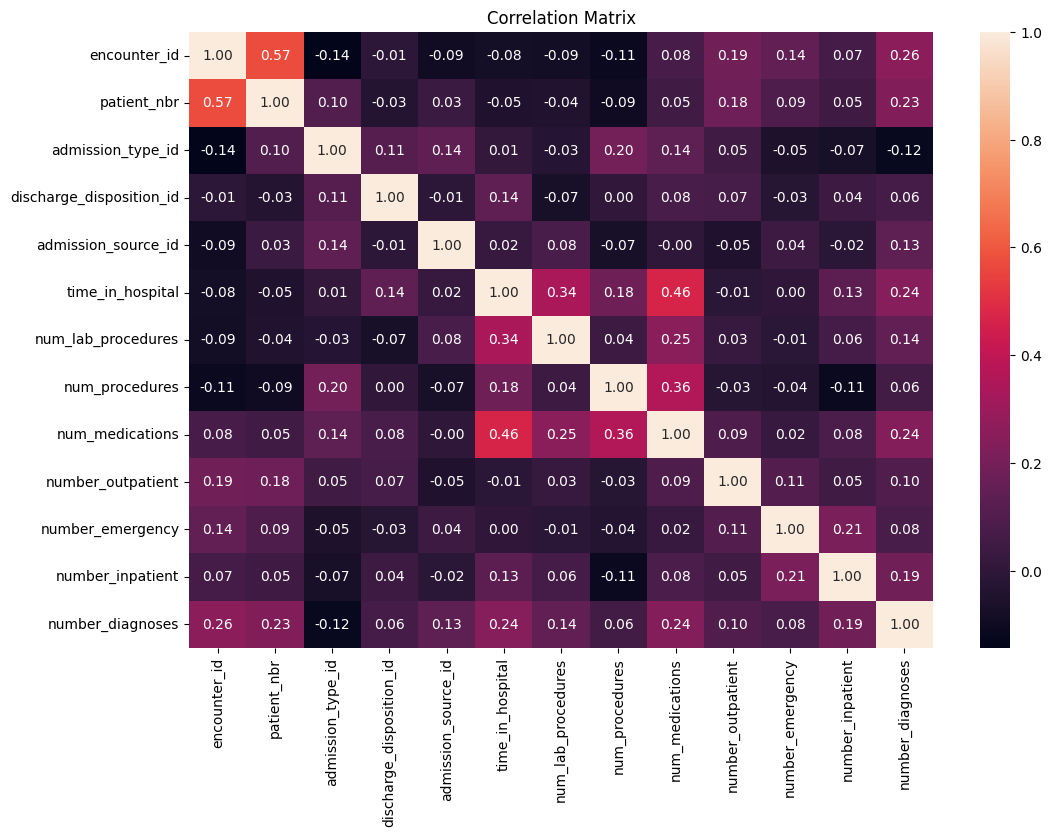

In [59]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', data=df_cleaned)
plt.title('Distribution of Time in Hospital')
plt.show()

# Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(12, 8))
numerical_df = df_cleaned.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Adding the Models for Benchmarking

In [60]:
# Function to calculate and print RMSE, R2, and MAE
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"  RMSE: {rmse}")
    print(f"  R²: {r2}")
    print(f"  MAE: {mae}")
    print("\n")

# 1. Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# 2. Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state=42))])
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")

# 3. K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', KNeighborsRegressor())])
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")

# 4. Support Vector Regressor
from sklearn.svm import SVR

svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")

# 5. Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge())])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# 6. Lasso Regression
from sklearn.linear_model import Lasso

lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Lasso())])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# 7. Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression Evaluation Metrics:
  RMSE: 1.9956609485635255
  R²: 0.4968908147166571
  MAE: 1.2784342950388448


Decision Tree Regressor Evaluation Metrics:
  RMSE: 1.4448183276799889
  R²: 0.7362969138843622
  MAE: 0.5925


K-Nearest Neighbors Regressor Evaluation Metrics:
  RMSE: 2.1323226772700234
  R²: 0.4256262553530148
  MAE: 1.527


Support Vector Regressor Evaluation Metrics:
  RMSE: 2.014522712670493
  R²: 0.4873357133101802
  MAE: 1.2424781961077418


Ridge Regression Evaluation Metrics:
  RMSE: 1.8014143904897715
  R²: 0.5900640711633716
  MAE: 1.3332248169301153


Lasso Regression Evaluation Metrics:
  RMSE: 2.6673333734783453
  R²: 0.10124084773166464
  MAE: 2.0577663700207456


Random Forest Evaluation Metrics:
  RMSE: 1.3946354362341435
  R²: 0.754297191798992
  MAE: 0.77795




Random Forest Modeling

In [61]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Function to calculate and print RMSE, R2, and MAE
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"  RMSE: {rmse}")
    print(f"  R²: {r2}")
    print(f"  MAE: {mae}")
    print("\n")


Random Forest Evaluation Metrics:
  RMSE: 1.3946354362341435
  R²: 0.754297191798992
  MAE: 0.77795




Neural Network Modeling

X_train_nn type: <class 'numpy.ndarray'>, is sparse: False
X_test_nn type: <class 'numpy.ndarray'>, is sparse: False
X_train_nn type after conversion: <class 'numpy.ndarray'>, shape: (1599, 615)
X_test_nn type after conversion: <class 'numpy.ndarray'>, shape: (400, 615)
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 25.3811 - val_loss: 8.4859 - learning_rate: 0.0010
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4115 - val_loss: 5.8476 - learning_rate: 0.0010
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.7355 - val_loss: 5.2456 - learning_rate: 0.0010
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.8844 - val_loss: 4.9354 - learning_rate: 0.0010
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4018 - val_loss: 4.7632 - learning_rate: 0.0010
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9045 - val_loss: 4.6235 - learning_rate: 0.0010
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4328 - val_l

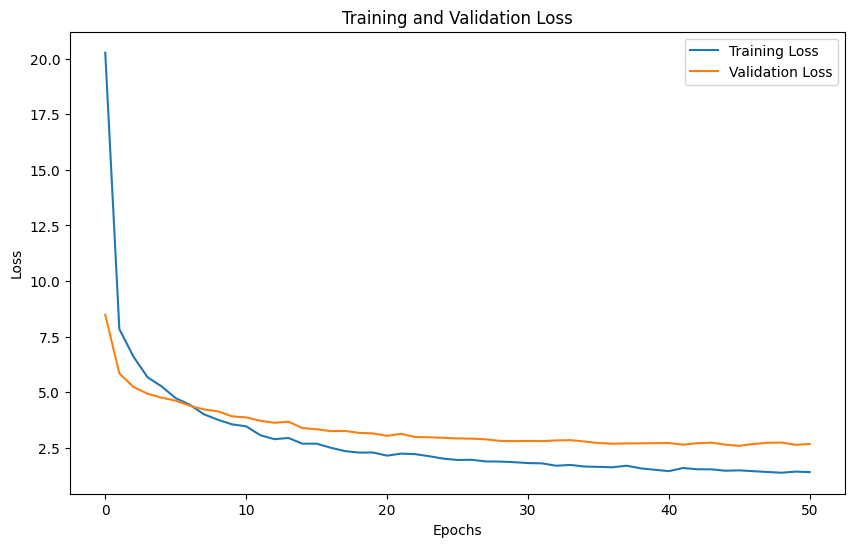

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Final Neural Network -> RMSE: 1.3690225128757245, R2: 0.7632391403897673, MAE: 0.7796107912063599


In [62]:
# Modify the OneHotEncoder to produce dense output
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensure dense output
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define a Neural Network model with improvements
def build_nn_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Added L2 regularization
    model.add(Dropout(0.4))  # Increased dropout rate to 0.4
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))  # Added L2 regularization
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

# Preprocess the data
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

# Check if the output is sparse
print(f"X_train_nn type: {type(X_train_nn)}, is sparse: {scipy.sparse.issparse(X_train_nn)}")
print(f"X_test_nn type: {type(X_test_nn)}, is sparse: {scipy.sparse.issparse(X_test_nn)}")

# If it's sparse, convert it to dense format
if scipy.sparse.issparse(X_train_nn):
    X_train_nn = X_train_nn.toarray()
if scipy.sparse.issparse(X_test_nn):
    X_test_nn = X_test_nn.toarray()

# Now, check again to confirm
print(f"X_train_nn type after conversion: {type(X_train_nn)}, shape: {X_train_nn.shape}")
print(f"X_test_nn type after conversion: {type(X_test_nn)}, shape: {X_test_nn.shape}")

# Build and train the neural network
nn_model = build_nn_model(X_train_nn.shape[1])

# Define callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = nn_model.fit(X_train_nn, y_train, validation_data=(X_test_nn, y_test),
                       epochs=100, batch_size=32,
                       callbacks=[early_stopping, lr_scheduler])

# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the final model on the test set
y_pred_nn = nn_model.predict(X_test_nn)

# Calculate RMSE, R², and MAE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f"Final Neural Network -> RMSE: {rmse_nn}, R2: {r2_nn}, MAE: {mae_nn}")


Neural Network Visualization

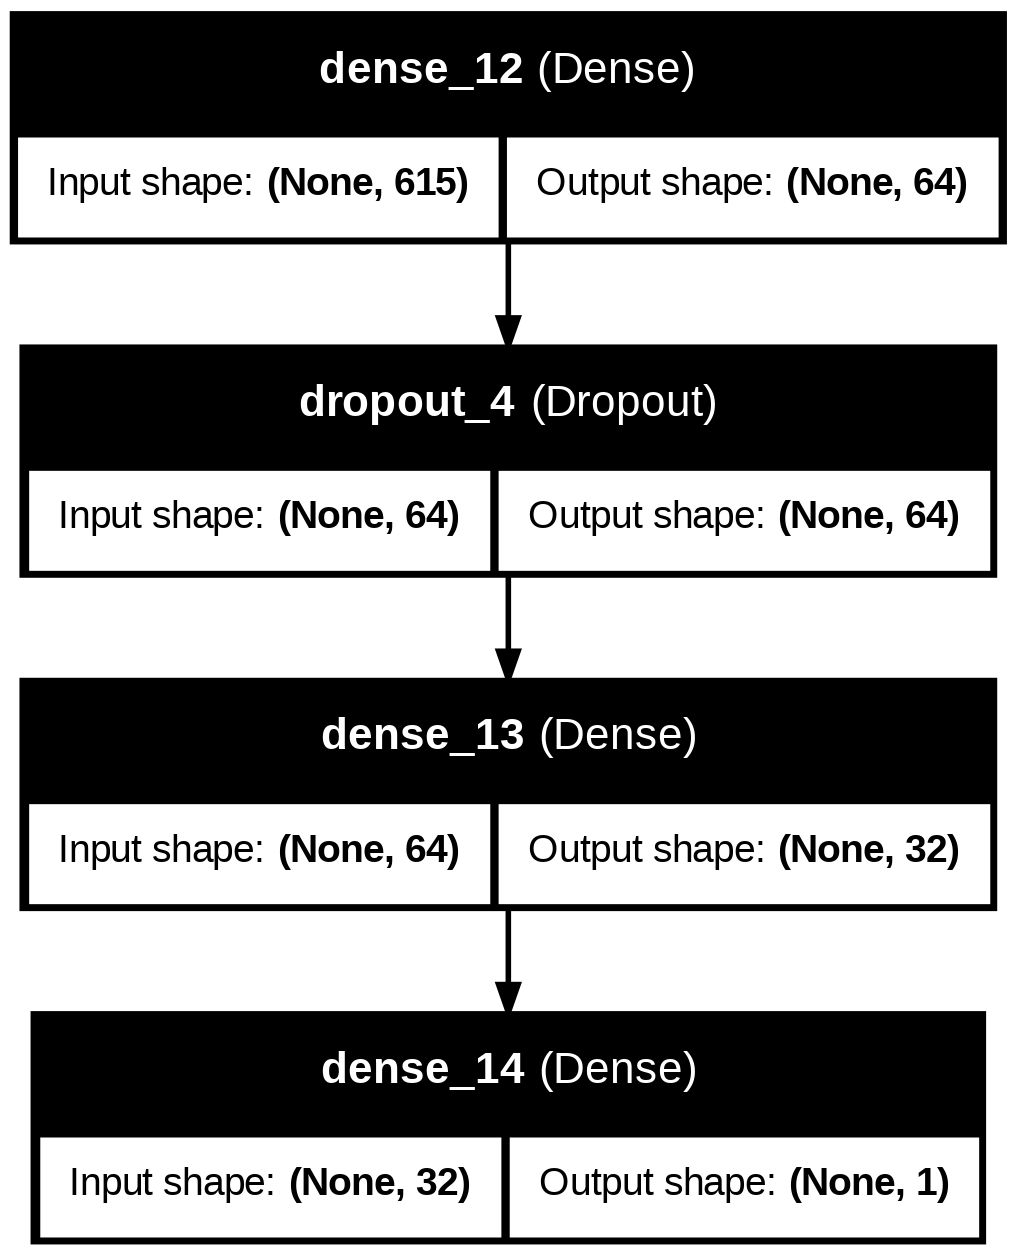

In [63]:
# Assuming 'nn_model' is your trained neural network model
plot_model(nn_model, to_file='nn_model_structure.png', show_shapes=True, show_layer_names=True)

Hyperparameter Tuning with GridSearchCV

In [64]:
# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print(f"Best parameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate RMSE, R², and MAE for the tuned model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f"Tuned Random Forest -> RMSE: {rmse_best_rf}, R2: {r2_best_rf}, MAE: {mae_best_rf}")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Best parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Tuned Random Forest -> RMSE: 1.3946354362341435, R2: 0.754297191798992, MAE: 0.77795


Hyperparameter Tuning with RandomizedSearchCV

In [65]:
# Corrected parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_grid, cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model performance
print(f"Best parameters: {random_search.best_params_}")

best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate RMSE, R², and MAE for the tuned model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f"Tuned Random Forest -> RMSE: {rmse_best_rf}, R2: {r2_best_rf}, MAE: {mae_best_rf}")


Best parameters: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}
Tuned Random Forest -> RMSE: 1.367074136411206, R2: 0.7639125712858044, MAE: 0.762875


Random Forest Visualization

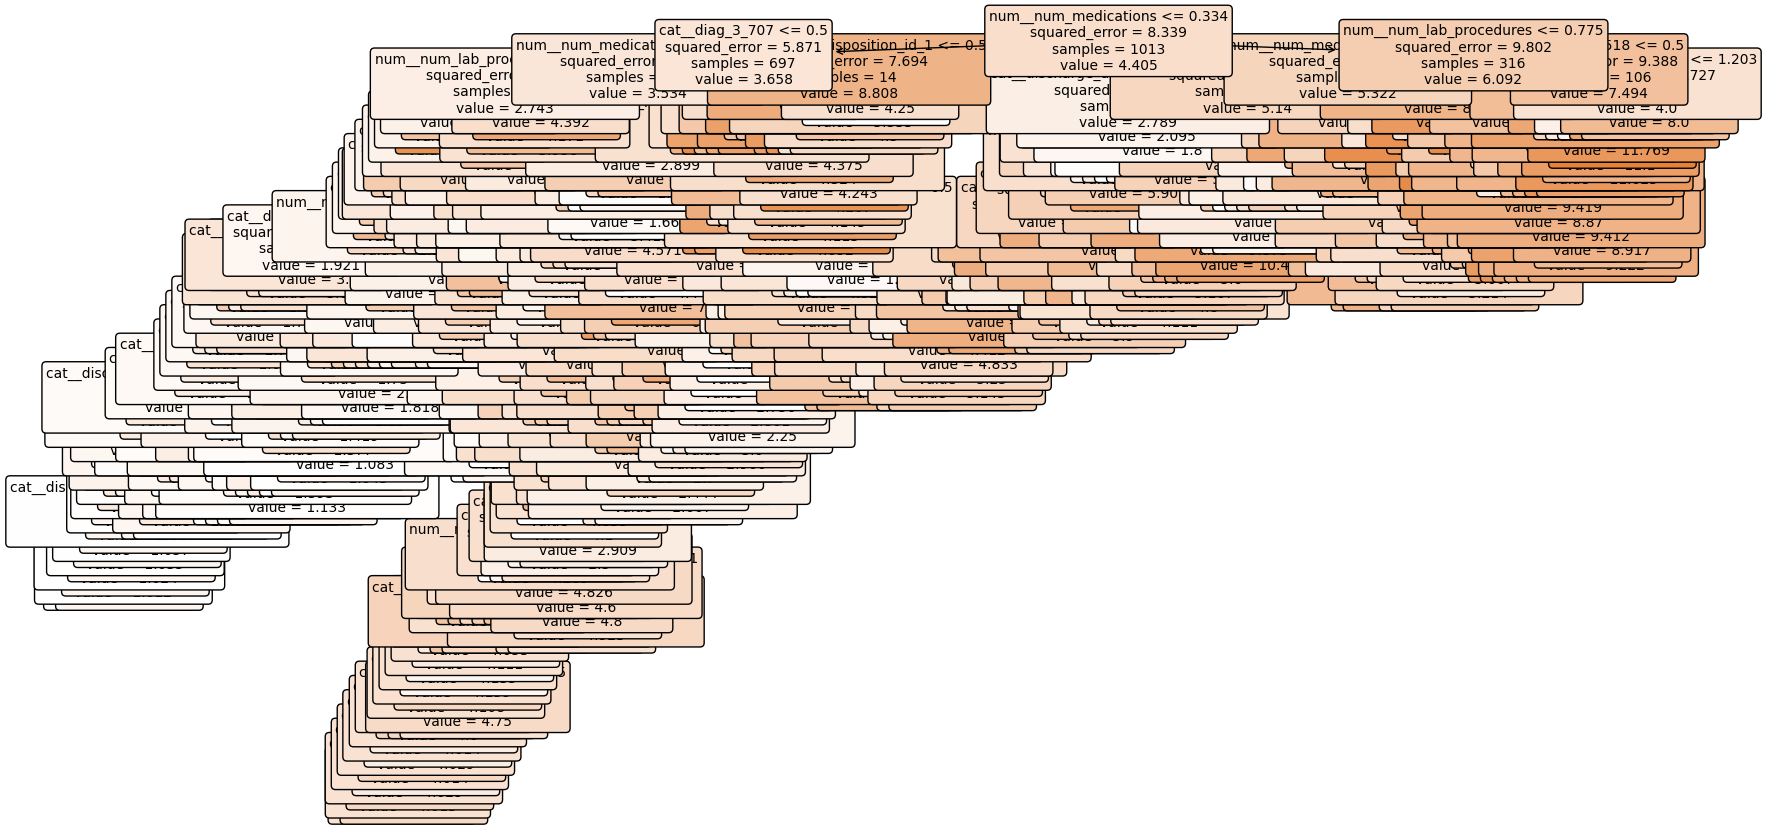

In [66]:
# Extract the Random Forest model from the pipeline
rf_model_extracted = rf_model.named_steps['regressor']  # Assuming 'regressor' is the name of the Random Forest step in your pipeline

# Transform the feature names to match the transformed data
transformed_feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()

# Plot a single tree from the Random Forest (e.g., the first tree)
plt.figure(figsize=(20,10))
plot_tree(rf_model_extracted.estimators_[0],  # Access the first decision tree in the Random Forest
          feature_names=transformed_feature_names,  # Use the transformed feature names
          filled=True,
          rounded=True,
          fontsize=10)

# Save the plot to a file
plt.savefig('random_forest_tree.png')

# Display the plot
plt.show()


Saving and Loading Models

In [67]:
# Save the trained neural network model using the recommended format
nn_model.save('nn_model.keras')

# Save the Random Forest model using joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the saved models
loaded_rf_model = joblib.load('best_rf_model.pkl')
loaded_nn_model = load_model('nn_model.keras')
loaded_nn_model.compile(optimizer='adam', loss='mse')

Making Predictions with Loaded Models

In [68]:
# Predict on new data
new_data = X_test.iloc[:5]  # Example new data
new_data_preprocessed = preprocessor.transform(new_data)
rf_predictions = loaded_rf_model.predict(new_data)
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

print("Random Forest Predictions:", rf_predictions)
print("Neural Network Predictions:", nn_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Random Forest Predictions: [8.34333333 3.82666667 9.19666667 2.34666667 3.9       ]
Neural Network Predictions: [[8.372443 ]
 [2.7859404]
 [9.349263 ]
 [1.9904672]
 [3.397713 ]]


Final Model Pipeline and Prediction

In [69]:
# Define the Random Forest model within a pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(rf_pipeline, param_grid, cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

# Save the best model pipeline
best_rf_pipeline = random_search.best_estimator_
joblib.dump(best_rf_pipeline, 'best_rf_pipeline.pkl')

['best_rf_pipeline.pkl']

Predicting on Raw New Data

In [70]:
# Load the saved pipeline
loaded_rf_pipeline = joblib.load('best_rf_pipeline.pkl')
loaded_nn_model = load_model('nn_model.keras')
loaded_nn_model.compile(optimizer='adam', loss='mse')  # Ensure the model is compiled

# Example new data (raw form, similar to the structure of the original dataset)
raw_new_data = pd.DataFrame({
    'admission_type_id': [1, 2, 3, 4, 5],
    'discharge_disposition_id': [1, 1, 6, 1, 3],
    'admission_source_id': [7, 7, 2, 4, 6],
    'num_lab_procedures': [41, 60, 49, 74, 40],
    'num_medications': [13, 16, 8, 9, 20],
    'number_diagnoses': [8, 9, 7, 5, 8],
    'race': ['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'age': ['[70-80)', '[50-60)', '[30-40)', '[60-70)', '[40-50)'],
    'diag_1': ['428', '250', '401', '414', '427'],
    'diag_2': ['250', '428', '250', '401', '414'],
    'diag_3': ['401', '414', '427', '428', '250']
})

# Predict using the loaded pipeline (preprocessing is handled within the pipeline)
rf_predictions = loaded_rf_pipeline.predict(raw_new_data)

# Round the predictions to the nearest whole number
rf_predictions_rounded = np.round(rf_predictions)

# Display the rounded predictions
print("Rounded Random Forest Predictions (Days in Hospital):", rf_predictions_rounded)

# Preprocess the data for the Neural Network model
new_data_preprocessed = loaded_rf_pipeline.named_steps['preprocessor'].transform(raw_new_data)

# Convert to dense format if necessary (since neural networks usually expect dense input)
if isinstance(new_data_preprocessed, np.ndarray) is False:
    new_data_preprocessed = new_data_preprocessed.toarray()

# Predict using the loaded Neural Network model
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

# Round the Neural Network predictions to the nearest whole number
nn_predictions_rounded = np.round(nn_predictions)
print("Rounded Neural Network Predictions (Days in Hospital):", nn_predictions_rounded)

combined_prediction = np.round((rf_predictions_rounded + nn_predictions_rounded) / 2)
print("Combined Prediction (Days in Hospital):", combined_prediction)

Rounded Random Forest Predictions (Days in Hospital): [3. 5. 4. 4. 4.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Rounded Neural Network Predictions (Days in Hospital): [[3.]
 [4.]
 [3.]
 [2.]
 [4.]]
Combined Prediction (Days in Hospital): [[3. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 [3. 4. 4. 4. 4.]
 [2. 4. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


Predicting on Single New Data Instance

In [71]:
# Load the saved Random Forest pipeline and Neural Network model
loaded_rf_pipeline = joblib.load('best_rf_pipeline.pkl')
loaded_nn_model = load_model('nn_model.keras')
loaded_nn_model.compile(optimizer='adam', loss='mse')  # Ensure the model is compiled

# Example new data (raw form, similar to the structure of the original dataset)
raw_new_data = pd.DataFrame({
    'admission_type_id': [1],
    'discharge_disposition_id': [1],
    'admission_source_id': [6],
    'num_lab_procedures': [68],
    'num_medications': [20],
    'number_diagnoses': [5],
    'race': ['Caucasian'],
    'gender': ['Female'],
    'age': ['[70-80)'],
    'diag_1': ['250.8'],
    'diag_2': ['599'],
    'diag_3': ['263']
})

# Predict using the loaded Random Forest pipeline (preprocessing is handled within the pipeline)
rf_predictions = loaded_rf_pipeline.predict(raw_new_data)

# Round the Random Forest predictions to the nearest whole number
rf_predictions_rounded = np.round(rf_predictions)
print("Rounded Random Forest Predictions (Days in Hospital):", rf_predictions_rounded)

# Preprocess the data for the Neural Network model
new_data_preprocessed = loaded_rf_pipeline.named_steps['preprocessor'].transform(raw_new_data)

# Convert to dense format if necessary (since neural networks usually expect dense input)
if isinstance(new_data_preprocessed, np.ndarray) is False:
    new_data_preprocessed = new_data_preprocessed.toarray()

# Predict using the loaded Neural Network model
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

# Round the Neural Network predictions to the nearest whole number
nn_predictions_rounded = np.round(nn_predictions)
print("Rounded Neural Network Predictions (Days in Hospital):", nn_predictions_rounded)

combined_prediction = np.round((rf_predictions_rounded + nn_predictions_rounded) / 2)
print("Combined Prediction (Days in Hospital):", combined_prediction)

Rounded Random Forest Predictions (Days in Hospital): [11.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Rounded Neural Network Predictions (Days in Hospital): [[10.]]
Combined Prediction (Days in Hospital): [[10.]]


Model Interpretation and Feature Importance

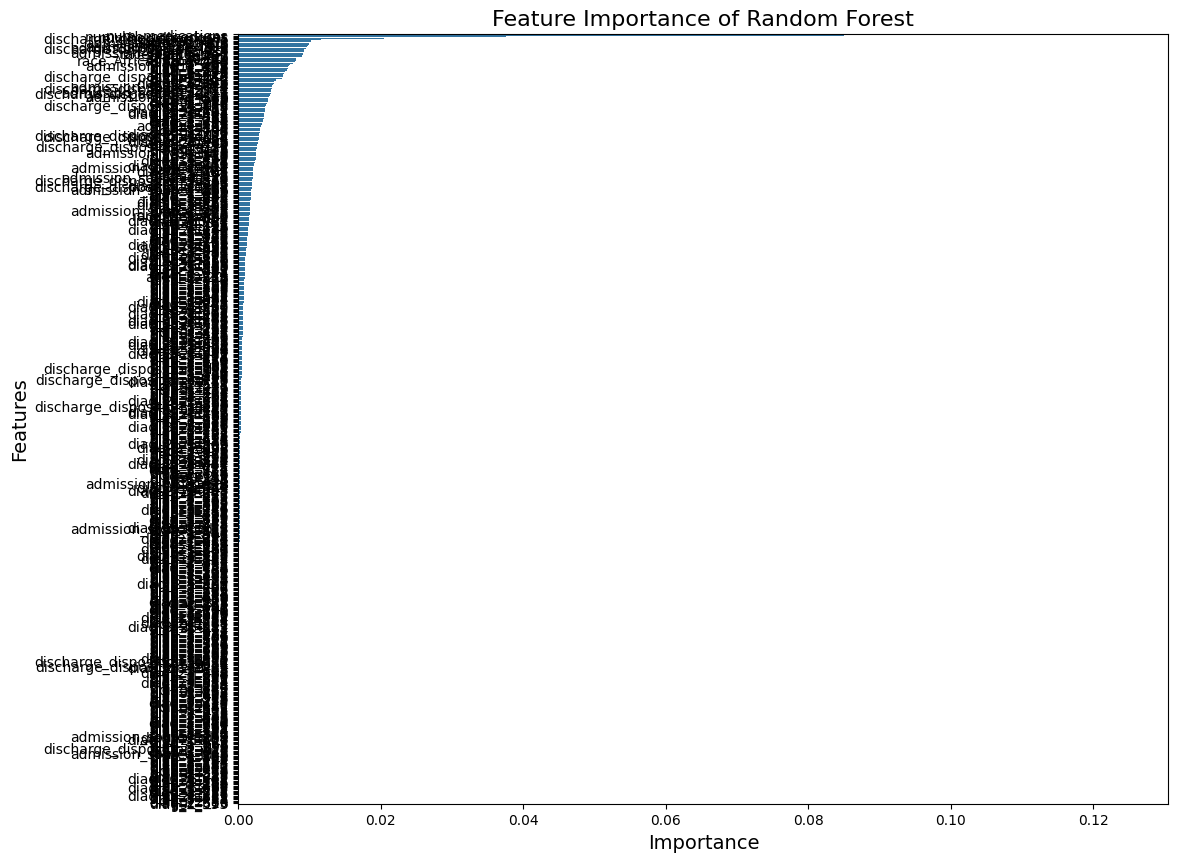

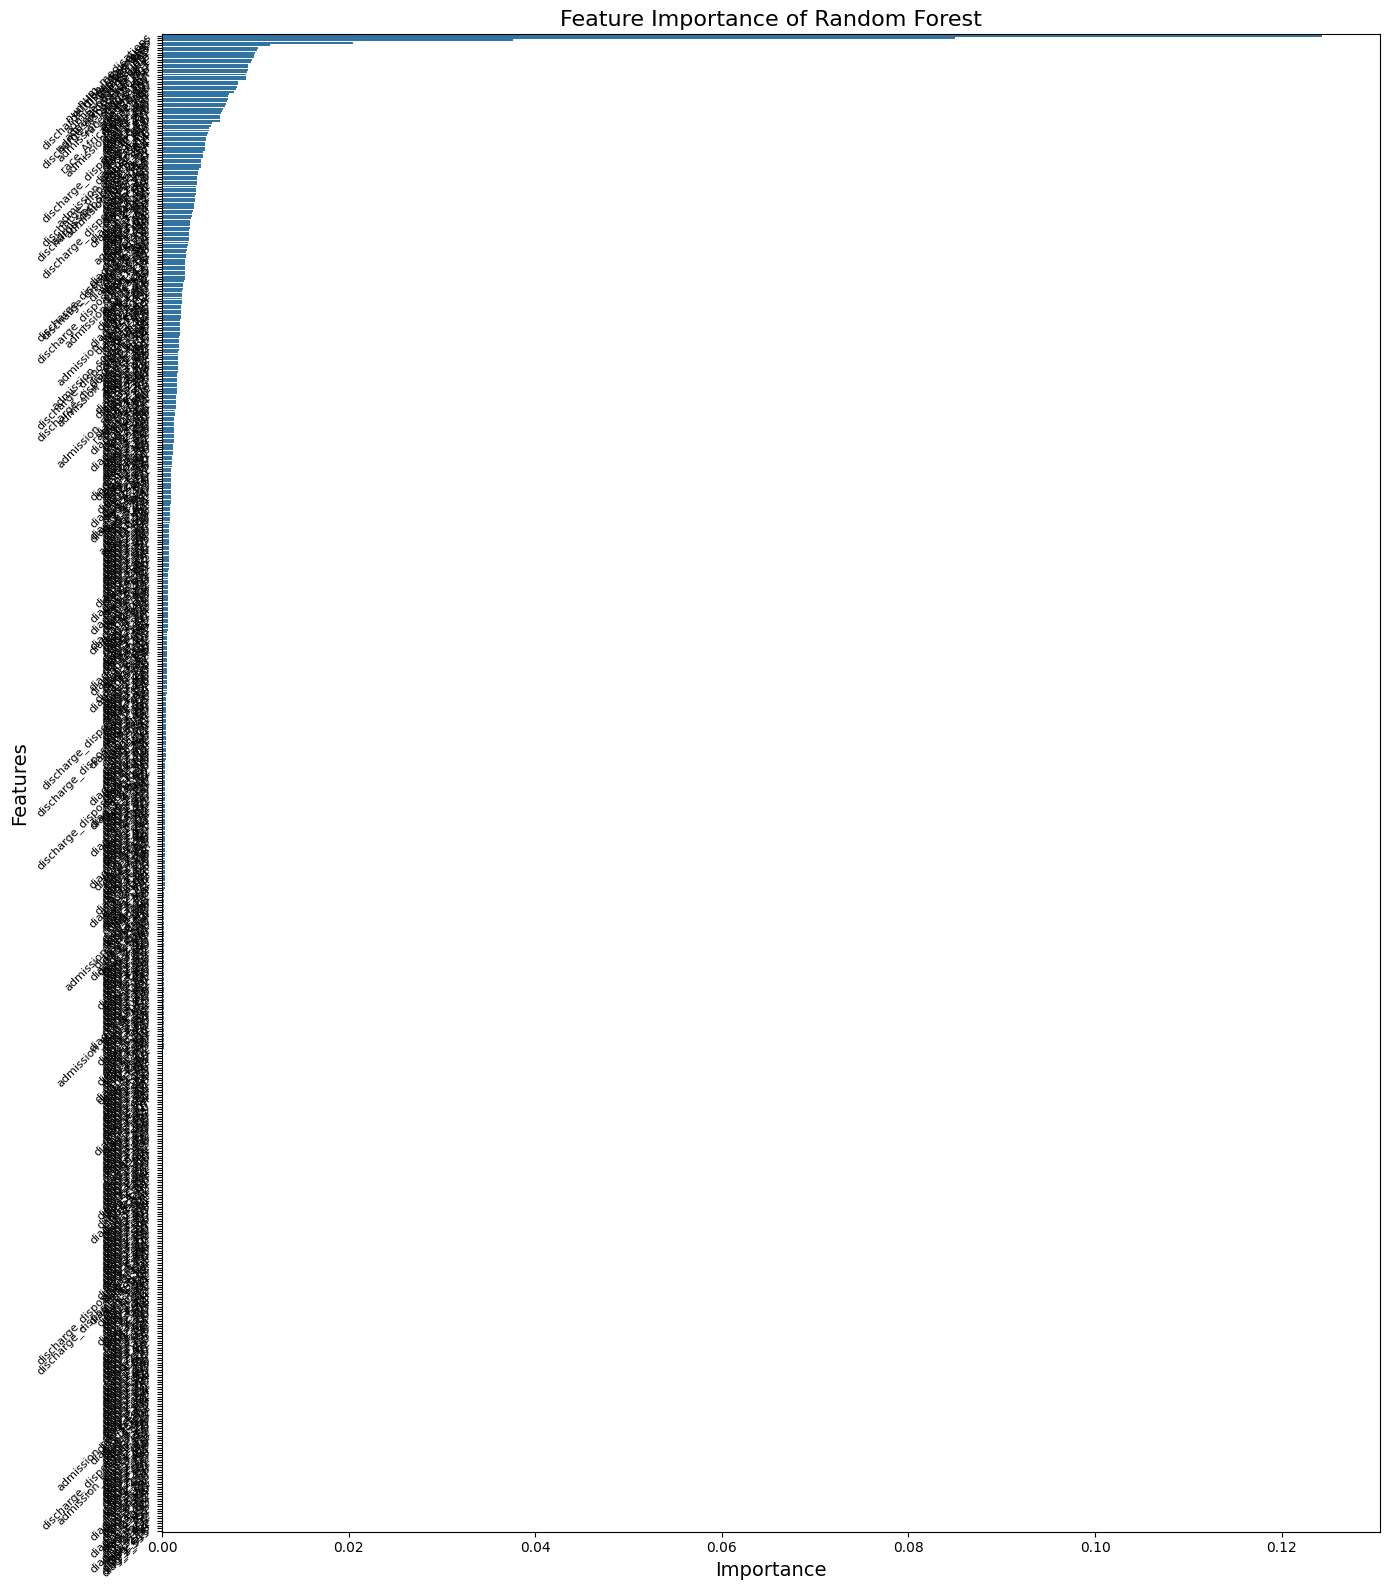

In [72]:
# Assuming `best_rf_pipeline` is your trained model pipeline

# Extract feature importances from the Random Forest model
importances = best_rf_pipeline.named_steps['regressor'].feature_importances_

# Map feature importances to feature names (after preprocessing)
# Note: OneHotEncoder creates new features for each category, so you need to track those changes
encoder = best_rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_categories = encoder.get_feature_names_out(categorical_features)

# Combine the feature names from numerical and encoded categorical features
all_features = np.concatenate([numeric_features, encoded_categories])

# Create a DataFrame to visualize feature importances
feature_importances = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances with improved readability
plt.figure(figsize=(12, 10))  # Increase figure size for better readability
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance of Random Forest', fontsize=16)  # Increase title font size
plt.xlabel('Importance', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Features', fontsize=14)  # Increase y-axis label font size

# Rotate y-axis labe# Assuming `best_rf_pipeline` is your trained model pipeline

# Extract feature importances from the Random Forest model
importances = best_rf_pipeline.named_steps['regressor'].feature_importances_

# Map feature importances to feature names (after preprocessing)
# Note: OneHotEncoder creates new features for each category, so you need to track those changes
encoder = best_rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_categories = encoder.get_feature_names_out(categorical_features)

# Combine the feature names from numerical and encoded categorical features
all_features = np.concatenate([numeric_features, encoded_categories])

# Create a DataFrame to visualize feature importances
feature_importances = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances with improved readability
plt.figure(figsize=(14, 16))  # Increase figure width and height for better readability
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance of Random Forest', fontsize=16)  # Increase title font size
plt.xlabel('Importance', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Features', fontsize=14)  # Increase y-axis label font size

# Rotate y-axis labels for better readability and reduce font size
plt.yticks(rotation=45, ha='right', fontsize=8)  # Rotate labels and reduce font size

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Save the figure with a higher resolution
plt.savefig('figure_4_3.png', dpi=300)

# Display the plot
plt.show()

Cross-Validation for Model Stability

In [73]:
from sklearn.model_selection import cross_val_score  # For performing cross-validation to evaluate the model's performance and ensure it generalizes well to unseen data

# Perform cross-validation with the best Random Forest pipeline
cv_scores = cross_val_score(best_rf_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print cross-validation results
print(f"Cross-Validation RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean()}")
print(f"Standard Deviation of CV RMSE: {cv_rmse_scores.std()}")

Cross-Validation RMSE scores: [2.29720207 2.45995085 2.20212265 2.56198645 2.5831157 ]
Mean CV RMSE: 2.4208755453266093
Standard Deviation of CV RMSE: 0.1489355515752453


Summary of Model Performance

In [74]:
import pandas as pd

# Function to evaluate model and return metrics
def evaluate_model_summary(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return {
        'Model': model_name,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae
    }

# Create an empty list to store model performance summaries
model_performance = []

# Linear Regression
y_pred_lr = lr_model.predict(X_test)
model_performance.append(evaluate_model_summary(y_test, y_pred_lr, "Linear Regression"))

# Decision Tree Regressor
y_pred_dt = dt_model.predict(X_test)
model_performance.append(evaluate_model_summary(y_test, y_pred_dt, "Decision Tree Regressor"))

# K-Nearest Neighbors Regressor
y_pred_knn = knn_model.predict(X_test)
model_performance.append(evaluate_model_summary(y_test, y_pred_knn, "K-Nearest Neighbors Regressor"))

# Support Vector Regressor
y_pred_svr = svr_model.predict(X_test)
model_performance.append(evaluate_model_summary(y_test, y_pred_svr, "Support Vector Regressor"))

# Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
model_performance.append(evaluate_model_summary(y_test, y_pred_ridge, "Ridge Regression"))

# Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)
model_performance.append(evaluate_model_summary(y_test, y_pred_lasso, "Lasso Regression"))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
model_performance.append(evaluate_model_summary(y_test, y_pred_rf, "Random Forest"))

# Neural Network
y_pred_nn = nn_model.predict(X_test_nn)
model_performance.append(evaluate_model_summary(y_test, y_pred_nn, "Neural Network"))

# Convert the list to a DataFrame
model_performance_df = pd.DataFrame(model_performance)

# Display the summary
print(model_performance_df)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
                           Model      RMSE        R²       MAE
0              Linear Regression  1.995661  0.496891  1.278434
1        Decision Tree Regressor  1.444818  0.736297  0.592500
2  K-Nearest Neighbors Regressor  2.132323  0.425626  1.527000
3       Support Vector Regressor  2.014523  0.487336  1.242478
4               Ridge Regression  1.801414  0.590064  1.333225
5               Lasso Regression  2.667333  0.101241  2.057766
6                  Random Forest  1.394635  0.754297  0.777950
7                 Neural Network  1.369023  0.763239  0.779611
